# Different interval length


In this notebook we want to analyse the effect of the different interval length to our infered soccer related effect.

In [1]:
import pickle
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from tqdm.auto import tqdm
import os

sys.path.append("../../")
sys.path.append("../../covid19_inference")
sys.path.append("../")

import covid19_soccer
from covid19_soccer.plot.utils import get_from_trace
import covid19_inference as cov19

from header_plotting import *

In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
def load(fstr):
    with open(fstr, "rb") as f:
         return pickle.load(f)

def load_function(country, offset=0, mwd="1.0", interval_cps="10.0", f_fem="0.33", f_robust="1.0", len="normal"):
        folder="covid_uefa_traces14_robustness"
        fstr=lambda tune, draws, max_treedepth, folder: (f"/data.nst/share/soccer_project/{folder}/run"+
            f"-beta=False"+
            f"-country={country}"+
            f"-offset_data={offset}"+
            f"-prior_delay=-1"+
            f"-median_width_delay={mwd}"+
            f"-interval_cps={interval_cps}"+
            f"-f_fem={f_fem}"+
            f"-len=normal"+
            f"-abs_sine=False"+
            f"-t={tune}"+
            f"-d={draws}"+
            f"-max_treedepth={max_treedepth}.pkl")
        if not f_robust == "1.0":
            fstr=lambda tune, draws, max_treedepth, folder: (f"/data.nst/share/soccer_project/covid_uefa_traces14/run"+
                f"-beta=False"+
                f"-country={country}"+
                f"-offset_data={offset}"+
                f"-prior_delay=-1"+
                f"-median_width_delay={mwd}"+
                f"-interval_cps={interval_cps}"+
                f"-f_fem={f_fem}"+
                f"-len=normal"+
                f"-abs_sine=False"+
                f"-t={tune}"+
                f"-d={draws}"+
                f"-max_treedepth={max_treedepth}.pkl")
        model = None
        
        tune, draws, max_treedepth = (2000, 4000, 12)
        folder="covid_uefa_traces14_robustness"
        if os.path.exists(fstr(tune, draws, max_treedepth, folder)):
            model, trace = load(fstr(tune, draws, max_treedepth, folder))
            print(f"Use {draws} sample runs for {country}")
            
        tune, draws, max_treedepth = (1000, 2000, 12)
        folder="covid_uefa_traces15"
        if os.path.exists(fstr(tune, draws, max_treedepth, folder)):
            model, trace = load(fstr(tune, draws, max_treedepth, folder))
            print(f"Use {draws} sample runs for {country}")
        tune, draws, max_treedepth = (500, 1000, 12)
        if os.path.exists(fstr(tune, draws, max_treedepth, folder)):
            model, trace = load(fstr(tune, draws, max_treedepth, folder))
            print(f"Use {draws} sample runs for {country}")
        
        if model is None: 
            print(fstr(tune, draws, max_treedepth, folder), " not found")
            return None, None
        
        # Remove chains with likelihood larger than -200, should only be the case for 2 chains in France
        mask = (np.mean(trace.sample_stats.lp, axis=1)>-200)
        trace.posterior = trace.posterior.sel(chain=~mask)
        return model, trace

In [10]:

# Save figure  keyword args   
save_kwargs = {
    "transparent":True,
    "dpi":300,
    "bbox_inches":"tight"
}
fig_path = "../figures/SI"


In [8]:
countries = ['England', 'Czechia', 'Scotland', 'Spain', 'Italy', 'Slovakia',
       'Germany', 'Austria', 'Belgium', 'France', 'Portugal',
       'Netherlands']

tune = 2000
draws = 4000
max_treedepth = 12
traces, models, dls = {}, {}, {}
for country in tqdm(countries):
    #'UEFA-beta=False-country=England-offset_games=0-draw_delay=True-weighted_alpha_prior=0-prior_delay=-1-width_delay_prior=0.1-sigma_incubation=-1.0-median_width_delay=1.0-tune=200-draws=300-max_treedepth=10.pickled'
    models_t, traces_t, dls_t = [],[],[]
    for interval in [6.0,10.0,20.0]:
        model,trace = load_function(country, interval_cps= interval)

        dl = covid19_soccer.dataloader.Dataloader_gender(countries=[country])
        models_t.append(model)
        traces_t.append(trace)
        dls_t.append(dl)
    models[country] = models_t
    traces[country] = traces_t
    dls[country] = dls_t

  0%|          | 0/12 [00:00<?, ?it/s]

Use 4000 sample runs for England with 0 offset
Use 4000 sample runs for England with 0 offset
Use 4000 sample runs for England with 0 offset
Use 4000 sample runs for Czechia with 0 offset
Use 4000 sample runs for Czechia with 0 offset
Use 4000 sample runs for Czechia with 0 offset
Use 4000 sample runs for Scotland with 0 offset
Use 4000 sample runs for Scotland with 0 offset
Use 4000 sample runs for Scotland with 0 offset
Use 4000 sample runs for Spain with 0 offset
Use 4000 sample runs for Spain with 0 offset
Use 4000 sample runs for Spain with 0 offset
Use 4000 sample runs for Italy with 0 offset
Use 4000 sample runs for Italy with 0 offset
Use 4000 sample runs for Italy with 0 offset
Use 2000 sample runs for Slovakia with 0 offset
Use 4000 sample runs for Slovakia with 0 offset
Use 2000 sample runs for Slovakia with 0 offset
Use 2000 sample runs for Slovakia with 0 offset
Use 4000 sample runs for Germany with 0 offset
Use 4000 sample runs for Germany with 0 offset
Use 4000 sample ru

[2 0 1]
Country	50.0	2.5	97.5	16	84	>0
England0	14.010615361296068	6.646773818964299	22.90397475932107	8.944502575462085	19.18102430823777	1.0
England1	11.935177588172856	5.267378566966791	22.69459626107414	6.689633736454913	16.120701592170825	1.0
England2	17.63273308369501	8.61148100974788	26.776099888682747	12.760405112646412	23.679900220429086	1.0
[1 0 2]
Country	50.0	2.5	97.5	16	84	>0
Czechia0	9.404368396942466	3.3442858952362853	15.847427234770995	6.337179939259541	12.647709885694125	0.99909375
Czechia1	9.593000276607299	3.181328176697239	16.053185226245763	6.379407492466587	12.905922627279747	0.99859375
Czechia2	9.244385544717634	2.37611682757787	16.037058808412606	5.75025001076077	12.728622160313398	0.9974375
[0 2 1]
Country	50.0	2.5	97.5	16	84	>0
Scotland0	4.0625117423910595	1.2754997235285763	9.051385759401544	1.7573507819389602	7.359105641365477	1.0
Scotland1	3.299030800545601	1.226047140552335	7.972233004422457	1.623816121833024	6.7935879624368205	1.0
Scotland2	4.02250872405

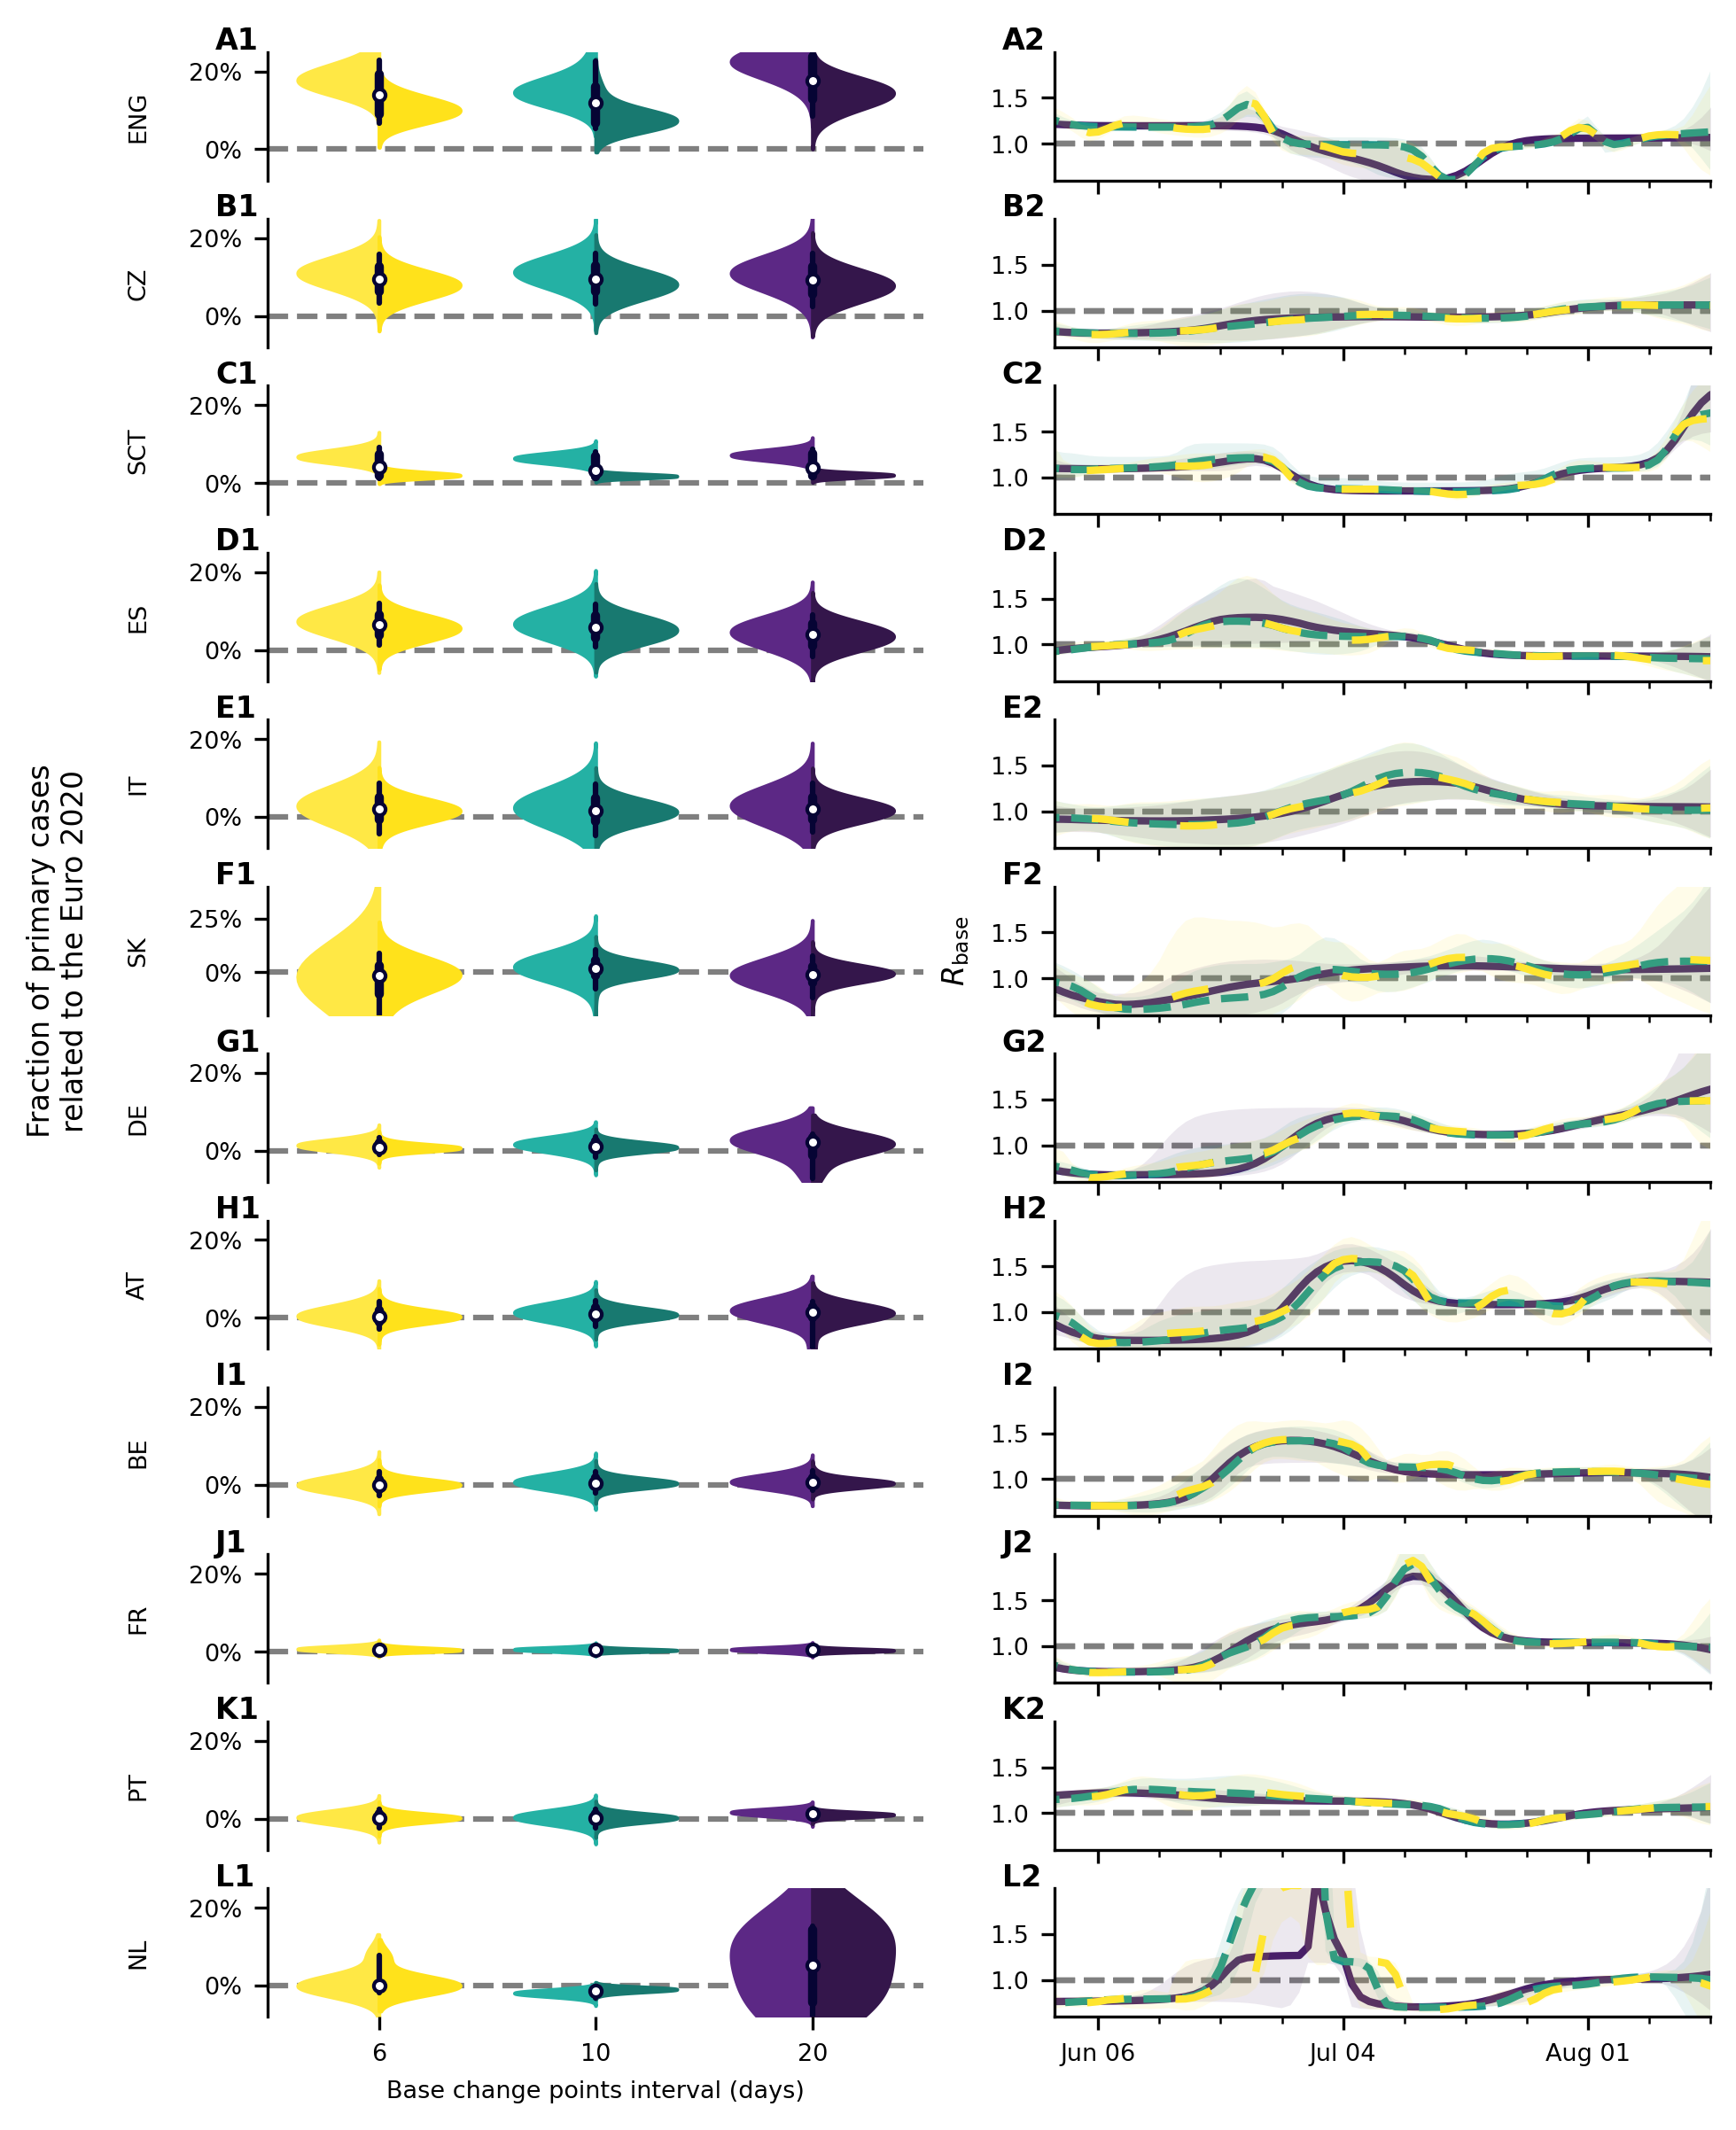

In [16]:
from covid19_soccer.plot.utils import lighten_color
from matplotlib.colors import to_hex
fig, axes = plt.subplots(len(countries),2,figsize=(7,len(countries)*0.8),gridspec_kw={"hspace":0.3,"wspace":0.2})

colors_base = ["#ffe530","#1e958a","#481f68"]
l = 0.9
d = 1.1

colors_mf = []
for col in colors_base:
    colors_mf.append(to_hex(lighten_color(col,l)))
    colors_mf.append(to_hex(lighten_color(col,d)))
colors_mf = np.array(colors_mf)

for i, country in enumerate(countries):
    covid19_soccer.plot.other.soccer_related_cases_overview(
        ax=axes[i,0],
        traces=traces[country],
        models=models[country],
        dls=dls[country],
        country_order=[0,1,2],
        colors=colors_mf,
        bw=1,
        remove_outliers=True
        )
    axes[i,0].set_xticklabels(["6","10","20"])
    axes[i,0].set_ylabel(dls[country][0].countries_iso2[0].replace("GB-",""))
    axes[i,0].yaxis.set_label_coords(-0.18, 0.5)

    if i != len(countries)-1:
        axes[i,0].set_xticklabels([])
        axes[i,0].tick_params(bottom=False)

    for j, (trace, model , dl, color,ls) in enumerate(zip(traces[country], models[country], dls[country], colors_base, [(0, (5, 7)),"dashed","-"])):
        covid19_soccer.plot.timeseries.R_base(
            ax=axes[i,1],
            trace=trace,
            model=model,
            dl=dl,
            color=color,
            ls=ls,
            lw=2,
            zorder= 1 if j==1 else (2 if j==0 else 0)
        )
        axes[i,1].set_xlim(dl.data_begin,dl.data_end)
    axes[i,1].set_ylim(0.6,2)
    

# Array of capital letters
letters = np.array(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))

# Add label letters to figure
for i, country in enumerate(countries):
    axes[i,0].text(
        -0.08,
        1.2,
        letters[i]+"1",
        transform=axes[i,0].transAxes,
        fontsize=8,
        fontweight="bold",
        verticalalignment="top"
    )
    axes[i,1].text(
        -0.08,
        1.2,
        letters[i]+"2",
        transform=axes[i,1].transAxes,
        fontsize=8,
        fontweight="bold",
        verticalalignment="top"
    )

    if i != len(countries)-1:
        axes[i,1].set_xticklabels([])
    axes[i,1].set_yticks([1,1.5])


# set ylims
ylims = {
    "England":[-8,25],
    "Czechia":[-8,25],
    "Italy":[-8,25],
    "Scotland":[-8,25],
    "Spain":[-8,25],
    "Germany":[-8,25],
    "France":[-8,25],
    'Slovakia':[-20,40],
    'Austria':[-8,25],
    'Belgium':[-8,25],
    'Portugal':[-8,25],
    'Netherlands':[-8,25],
}


for i, country in enumerate(countries):
    axes[i,0].set_ylim(ylims[country])
    axes[i,1].set_ylabel("")



# Set overarching y label
axes[0,0].text(-0.32,-len(countries)/2,"Fraction of primary cases\nrelated to the Euro 2020",transform=axes[0,0].transAxes,rotation=90,ha="center",va="center",fontsize=8)
axes[0,1].text(-0.15,-len(countries)/2,"$R_\mathrm{base}$",transform=axes[0,1].transAxes,rotation=90,ha="center",va="center",fontsize=8)



axes[-1,0].set_xlabel("Base change points interval (days)")

fig.savefig(f"{fig_path}/intervals.png", **save_kwargs)
fig.savefig(f"{fig_path}/intervals.pdf", **save_kwargs)

plt.show()
plt.close(fig=fig)